# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the dataset through univariate & multivariate analysis 
- Investigate distribution of data 
- Extract relevant insights to determine steps for feature engineering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sys 
import os 
from collections import Counter

# Manually add path to read from another folder 
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from eda import *

In [3]:
# df = pl.read_csv("../data/cleaned_google_analytics.csv",ignore_errors=True)
df = pl.read_csv("../data/google_analytics_data.csv",ignore_errors=True)

In [4]:
df.head()

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
i64,i64,i64,str,str,str,str,str,str,str,str,str,str
20170320,1490013196,741694360311983889,"""Southern Europe""","""Spain""","""not available in demo dataset""","""Chrome""","""Windows""","""desktop""","""google""",null,"""YouTube Hard Cover Journal""","""Home/Shop by Brand/YouTube/"""
20170320,1490075224,751716124732042493,"""Northern America""","""United States""","""New York""","""Safari""","""iOS""","""mobile""","""google""",null,"""Google Alpine Style Backpack""","""Home/Bags/"""
20170320,1490069949,3875753008535006311,"""Northern America""","""United States""","""not available in demo dataset""","""Safari (in-app)""","""iOS""","""mobile""","""m.facebook.com""",null,"""YouTube Custom Decals""","""Home/Shop by Brand/YouTube/"""
20170320,1490030549,null,"""Southern Europe""","""Spain""","""Barcelona""","""Chrome""","""Macintosh""","""desktop""","""google""",null,"""Suitcase Organizer Cubes""","""Home/Bags/"""
20170210,1486780166,1321377067218362907,"""Northern America""","""United States""","""not available in demo dataset""","""Chrome""","""Android""","""mobile""","""google""",null,"""YouTube RFID Journal""","""Home/Shop by Brand/YouTube/"""


In [5]:
df.shape

(18608748, 13)

In [6]:
df.columns

['date',
 'visitStartTime',
 'fullVisitorId',
 'subContinent',
 'country',
 'city',
 'browser',
 'operatingSystem',
 'deviceCategory',
 'source',
 'transactionId',
 'v2ProductName',
 'v2ProductCategory']

In [7]:
df.dtypes

[Int64,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String]

In [8]:
df.describe()

statistic,date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
str,f64,f64,f64,str,str,str,str,str,str,str,str,str,str
"""count""",1.8608748e7,1.8608748e7,1.7310293e7,"""18608748""","""18608748""","""18608748""","""18608748""","""18608748""","""18608748""","""18608748""","""74457""","""18608748""","""18608748"""
"""null_count""",0.0,0.0,1.298455e6,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""18534291""","""0""","""0"""
"""mean""",2.0165e7,1.4827e9,4.1259e18,null,null,null,null,null,null,null,null,null,null
"""std""",4692.943408,9.7233e6,2.8348e18,null,null,null,null,null,null,null,null,null,null
"""min""",2.0160801e7,1.4700e9,5.1040e12,"""(not set)""","""(not set)""","""'s Hertogenbosch""","""(not set)""","""(not set)""","""desktop""","""(direct)""","""ORD2016080112""","""1 oz Hand Sanitizer""","""${escCatTitle}"""
"""25%""",2.0160912e7,1.4737e9,1.4003e18,null,null,null,null,null,null,null,null,null,null
"""50%""",2.0161205e7,1.4809e9,4.0153e18,null,null,null,null,null,null,null,null,null,null
"""75%""",2.0170402e7,1.4911e9,6.6050e18,null,null,null,null,null,null,null,null,null,null
"""max""",2.0170801e7,1.5017e9,9.2234e18,"""Western Europe""","""Åland Islands""","""not available in demo dataset""","""osee2unifiedRelease""","""iOS""","""tablet""","""youtube.com""","""ORD201708012585""","""YouTube Youth Short Sleeve Tee…","""YouTube/"""


In [9]:
df.select(pl.all().is_null().sum())

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,1298455,0,0,0,0,0,0,0,18534291,0,0


In [10]:
# Unique visitors 
print("Unique visitors:")
print(df.select(pl.col('fullVisitorId').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────────┐
│ fullVisitorId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 334653        │
└───────────────┘


In [11]:
print_popular_stats(df, "city")

city,count
str,u32
"""not available in demo dataset""",9879575
"""Mountain View""",1479141
"""New York""",968011
"""San Francisco""",628853
"""Sunnyvale""",490439
"""(not set)""",423707
"""San Jose""",341132
"""Los Angeles""",275126
"""Chicago""",260783


In [12]:
# Total transactions 
print("Number of transactions: ",df.select(pl.col("transactionId").is_not_null().sum()))

Number of transactions:  shape: (1, 1)
┌───────────────┐
│ transactionId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 74457         │
└───────────────┘


In [13]:
categories = df.filter(pl.col('transactionId') != 'null').select(pl.col('v2ProductCategory'))
categories = categories.select(pl.col("v2ProductCategory").value_counts(sort=True)).unnest("v2ProductCategory")
px.pie(categories[:10], values="count", names="v2ProductCategory", title="Sold Categories")

In [14]:
pie_categories = df.filter(pl.col('transactionId') != 'null').select(pl.col('v2ProductCategory'))
pie_categories = pie_categories.select(pl.col("v2ProductCategory").value_counts(sort=True)).unnest("v2ProductCategory")
pie_categories.write_csv("../utils/pie_categories.csv")

In [15]:
pie_products=df.filter(pl.col('transactionId') != 'null').select(pl.col('v2ProductName'))
pie_products=pie_products.select(pl.col("v2ProductName").value_counts(sort=True)).unnest("v2ProductName")
pie_products.write_csv("../utils/pie_products.csv")

In [16]:
viewed_products = df.select(pl.col("v2ProductName").value_counts(sort=True)).unnest("v2ProductName")
viewed_categories = df.select(pl.col("v2ProductCategory").value_counts(sort=True)).unnest("v2ProductCategory")
viewed_products.write_csv("../utils/viewed_products.csv")
viewed_categories.write_csv("../utils/viewed_categories.csv")

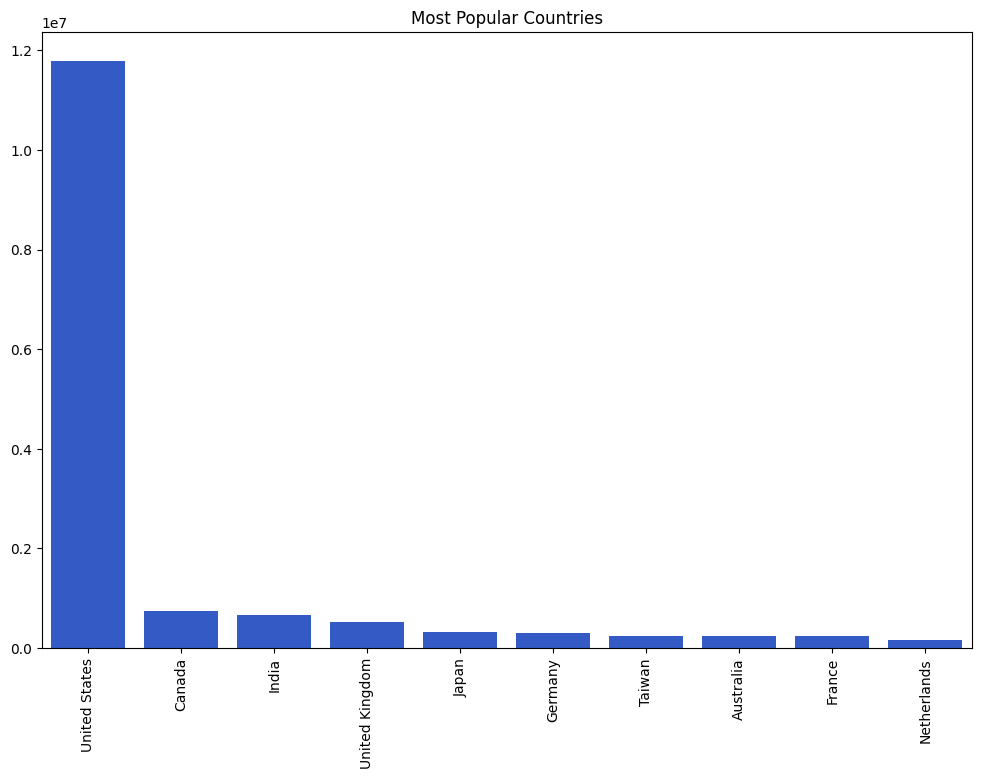

In [17]:
country = print_popular_stats(df, "country")['country'].to_numpy()
count = print_popular_stats(df, "country")['count'].to_numpy()
bar_plot(country, count,"Most Popular Countries")

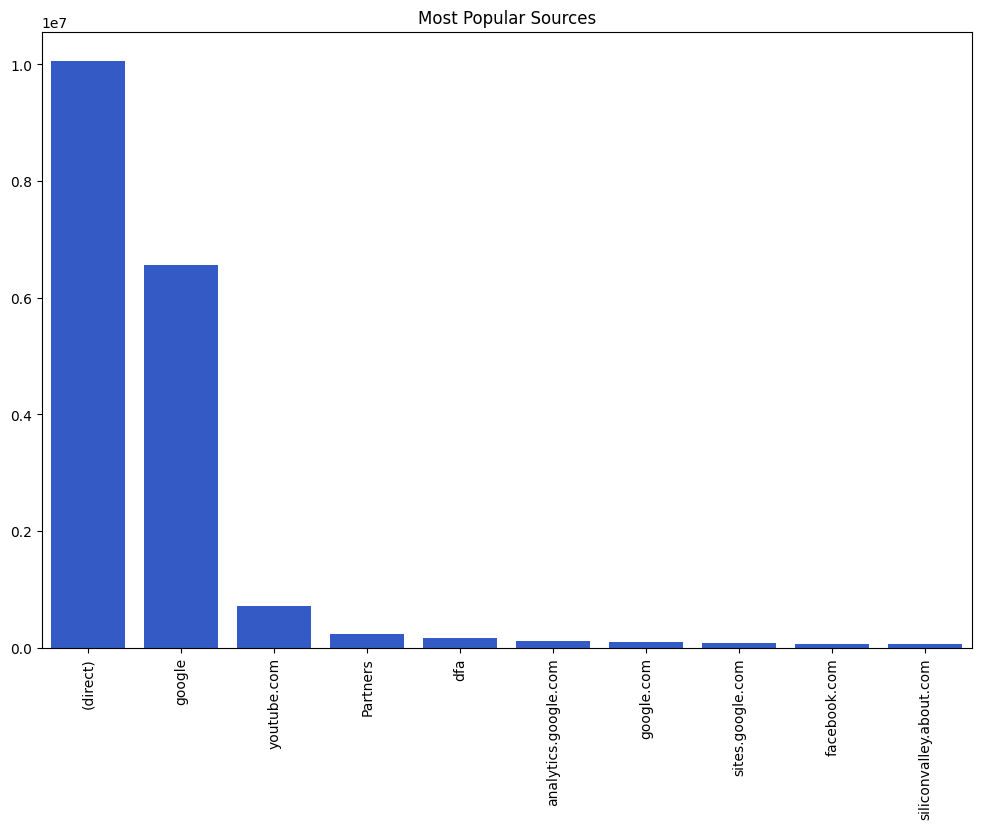

In [18]:
source = print_popular_stats(df, "source")['source'].to_numpy()
count = print_popular_stats(df, "source")['count'].to_numpy()
bar_plot(source, count,"Most Popular Sources")

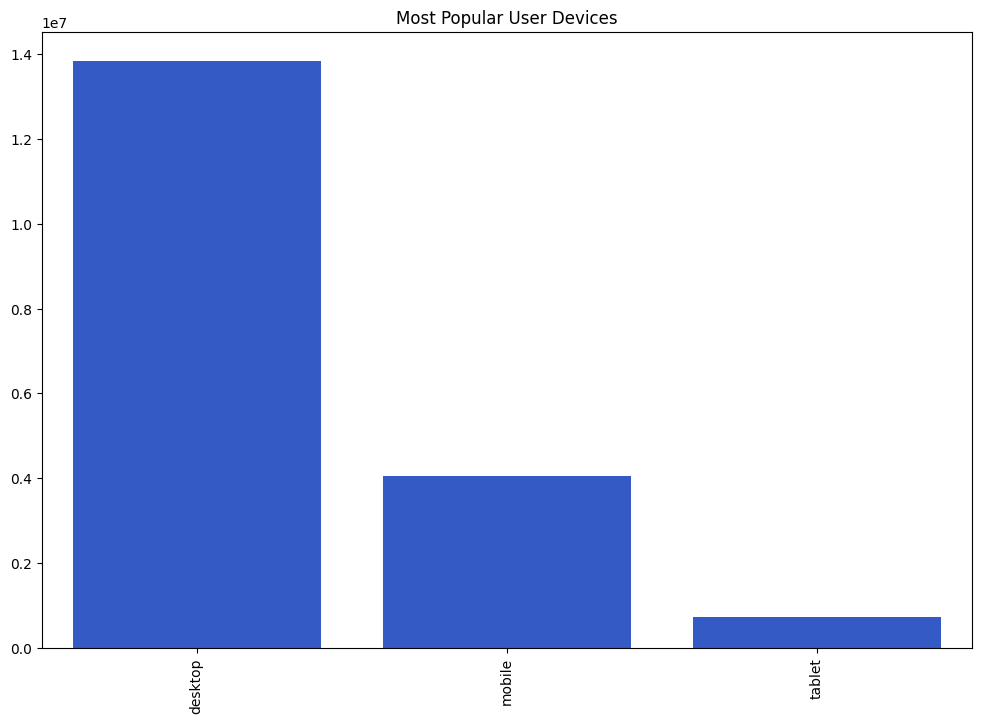

In [19]:
device = print_popular_stats(df, "deviceCategory")['deviceCategory'].to_numpy()
count = print_popular_stats(df, "deviceCategory")['count'].to_numpy()
bar_plot(device, count,"Most Popular User Devices")

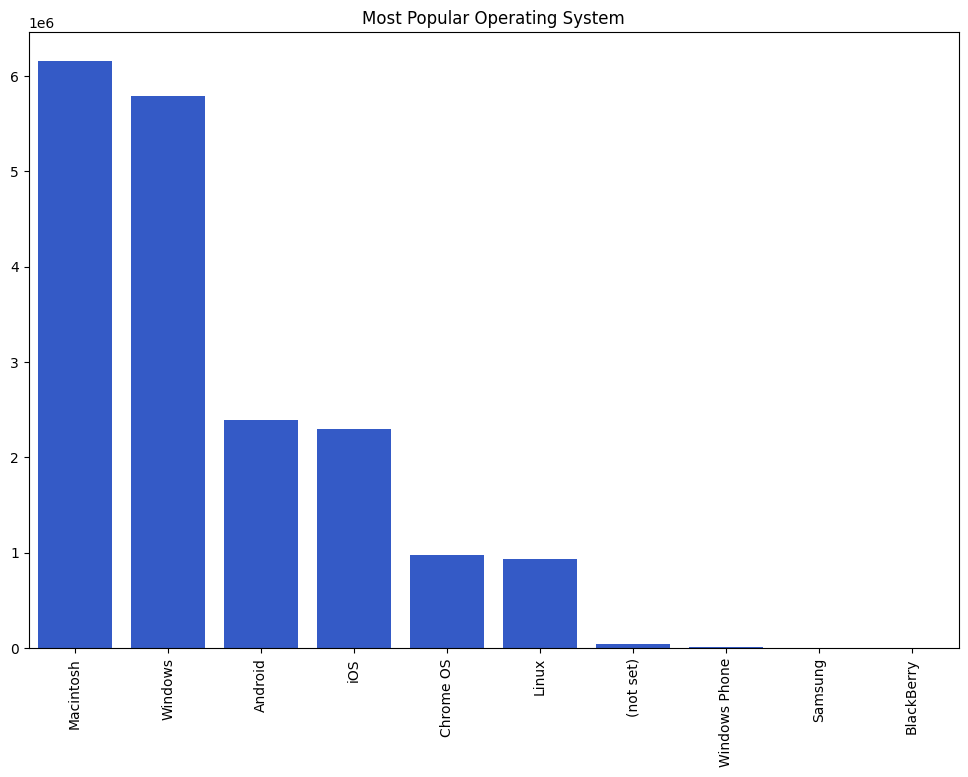

In [20]:
os = print_popular_stats(df, "operatingSystem")['operatingSystem'].to_numpy()
count = print_popular_stats(df, "operatingSystem")['count'].to_numpy()
bar_plot(os, count,"Most Popular Operating System")

In [41]:
daily_visitors=df.group_by(pl.col('date')).agg(pl.col('fullVisitorId').unique().len()).sort("date")

In [42]:
daily_visitors = daily_visitors.with_columns(
    pl.col("date")
    .cast(pl.Utf8)  # Convert to string to parse as date
    .str.strptime(pl.Date, format="%Y%m%d")  # Parse as date
    .dt.strftime("%d-%m-%Y")  # Format as day-month-year
    .alias("date")  # Add a new column with formatted dates
)

In [44]:
daily_visitors.write_csv("../utils/daily_visitors.csv")

In [43]:
daily_visitors

date,fullVisitorId
str,u32
"""01-08-2016""",837
"""02-08-2016""",921
"""03-08-2016""",1084
"""04-08-2016""",1252
"""05-08-2016""",1049
…,…
"""28-07-2017""",1425
"""29-07-2017""",1032
"""30-07-2017""",1174


In [37]:
daily_purchases=df.filter(pl.col('transactionId') != 'null').group_by(
    pl.col('date')).agg(pl.len()).sort("date")

In [38]:
daily_purchases = daily_purchases.with_columns(
    pl.col("date")
    .cast(pl.Utf8)  # Convert to string to parse as date
    .str.strptime(pl.Date, format="%Y%m%d")  # Parse as date
    .dt.strftime("%d-%m-%Y")  # Format as day-month-year
    .alias("date")  # Add a new column with formatted dates
)

In [39]:
daily_purchases

date,len
str,u32
"""01-08-2016""",226
"""02-08-2016""",124
"""04-08-2016""",78
"""05-08-2016""",376
"""06-08-2016""",148
…,…
"""28-07-2017""",330
"""29-07-2017""",150
"""30-07-2017""",194


In [40]:
daily_purchases.write_csv("../utils/daily_purchases.csv")

In [ ]:
popular_products = df.filter(pl.col('transactionId') != 'null').group_by(
    pl.col('date','v2ProductName')).agg(pl.len()).sort("date","len", descending=[False, True])

In [ ]:
daily_visitors=df.group_by(pl.col('date')).agg(pl.col('fullVisitorId').unique().len()).sort("date")
daily_visitors

: 

In [ ]:
popular_products

date,v2ProductName,len
i64,str,u32
20160801,"""Google Sunglasses""",22
20160801,"""Gift Card - $25.00""",20
20160801,"""22 oz Mini Mountain Bottle""",12
20160801,"""Engraved Ceramic Google Mug""",10
20160801,"""Google Men's 100% Cotton Short…",8
…,…,…
20170801,"""Android Lunch Kit""",2
20170801,"""Spiral Notebook and Pen Set""",2
20170801,"""Waze Baby on Board Window Deca…",2


In [ ]:
# popular_categories.top_k(5, by='len')

In [ ]:
encoded_df = pl.read_csv('../data/encoded_df.csv',ignore_errors=True)
encoded_df.head()

fullVisitorId,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductCategory
i64,f64,f64,f64,f64,f64,f64,i64,f64
741694360311983889,0.00003,0.003105,0.004717,0.002803,0.005017,0.00231,0,0.0
751716124732042493,0.005934,0.01018,0.001468,0.00104,0.001015,0.00231,0,0.0
3875753008535006311,0.005934,0.003105,0.000491,0.00104,0.001015,0.000824,0,0.0
null,0.00003,0.000514,0.004717,0.006595,0.005017,0.00231,0,0.0
1321377067218362907,0.005934,0.003105,0.004717,0.001074,0.001015,0.00231,0,0.0


In [ ]:
fig = px.imshow(encoded_df['country':].corr(), x=encoded_df.columns[1:], y=encoded_df.columns[1:], 
                    text_auto='.2f', title="Feature Correlations")
fig.show()